# Titanic Machine Learning From Disaster
# Created by Ayus Das.

## Problem Statement: The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [ ]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

### Step 1: Setting up the pre-requisites.

In [ ]:
# data analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data visualization
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization

sns.set_style('dark')

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Step 2: Loading the data.

In [ ]:
#loading the train and the test data
file_train = "https://github.com/ayusdas2000/titanic_case_study/raw/master/train.csv"
file_test = "https://github.com/ayusdas2000/titanic_case_study/raw/master/test.csv"
df_train = pd.read_csv(file_train, error_bad_lines=False)
df_test = pd.read_csv(file_test,error_bad_lines=False)

In [ ]:
#checking the head of train data.
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#checking the head of test data.
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Step 3: Looking in the basics of data.

In [ ]:
#checking the shape of train data.
df_train.shape

(891, 12)

In [ ]:
#checking the shape of test data
df_test.shape

(418, 11)

In [ ]:
#checking the info of train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#checking the info of test data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
#checking the description of train data
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#checking the description of test data
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### Checking Null values in the dataset.

In [ ]:
#checking null in train dataset.
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#checking null in test dataset.
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

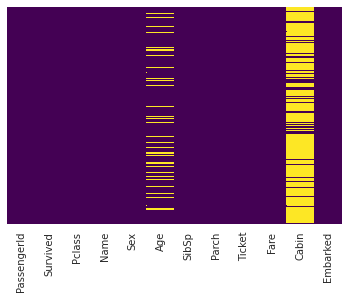

In [ ]:
#checking null in train through heatmap.
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

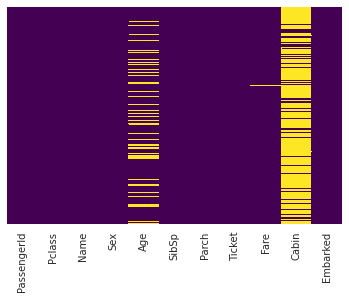

In [ ]:
#checking null in test through heatmap.
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Checking categorical values in the dataset

In [ ]:
#checking categorical values in train dataset.
categorical_feature_columns = list(set(df_train.columns) - set(df_train._get_numeric_data().columns))
categorical_feature_columns

['Sex', 'Cabin', 'Name', 'Embarked', 'Ticket']

In [ ]:
#checking categorical values in test dataset.
categorical_feature_columns = list(set(df_test.columns) - set(df_test._get_numeric_data().columns))
categorical_feature_columns

['Sex', 'Cabin', 'Name', 'Embarked', 'Ticket']

#### Name and ticket number are not significant features so we will drop them. And convert embarked, cabin and sex into dummy variable. The process will be done in data preparation part.

#### Checking outliers in train and test dataset through box plot.

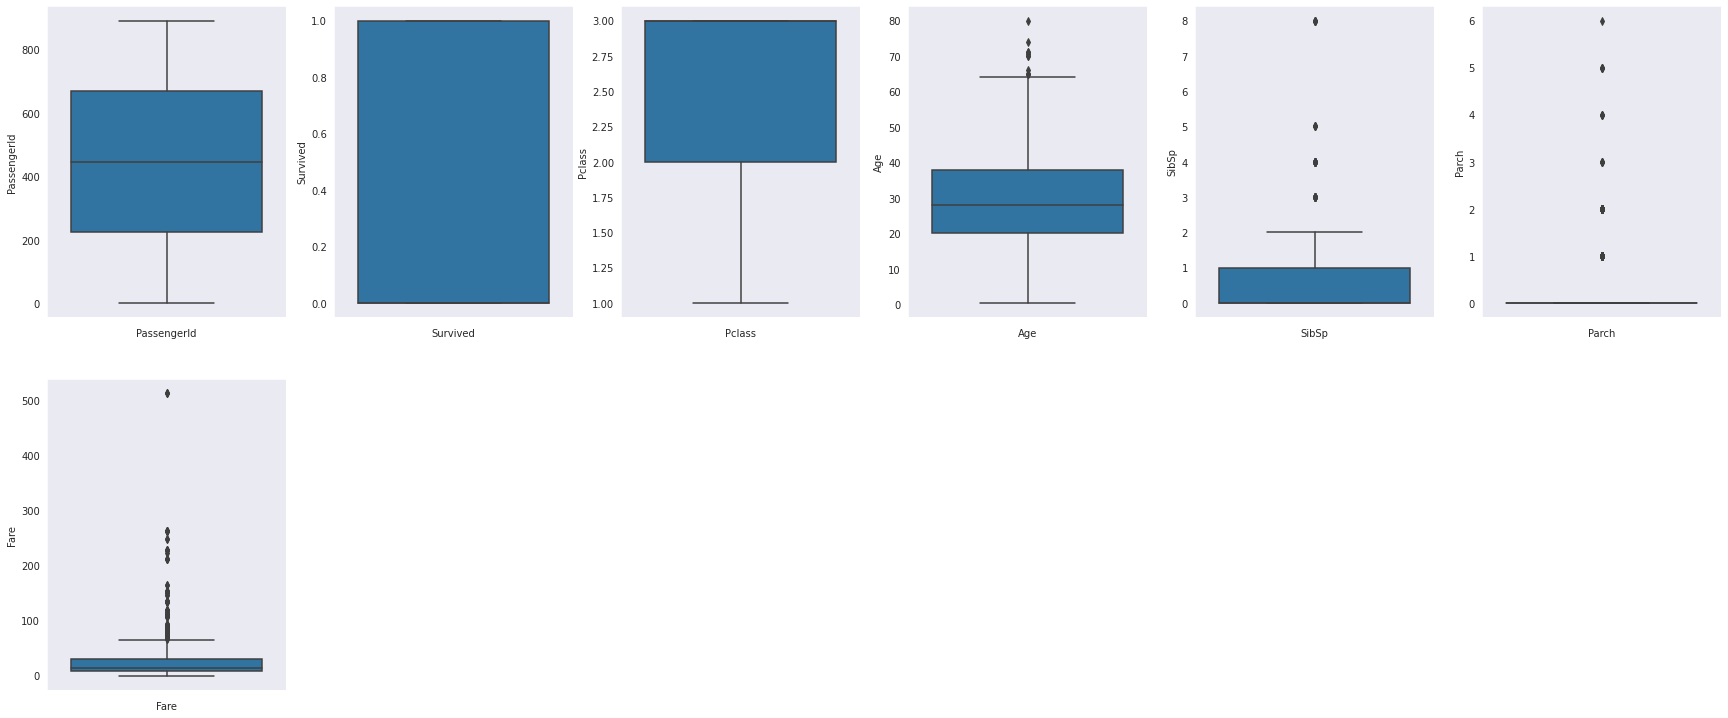

In [ ]:
#checking train dataset.
num_df_train=df_train.drop(['Name', 'Sex', 'Embarked', 'Ticket', 'Cabin'],axis=1)
plt.figure(figsize=(30,40))
k=1
for i in num_df_train.columns:
  plt.subplot(6,6,k)
  sns.boxplot(y=df_train[i])
  plt.xlabel(i)
  k=k+1

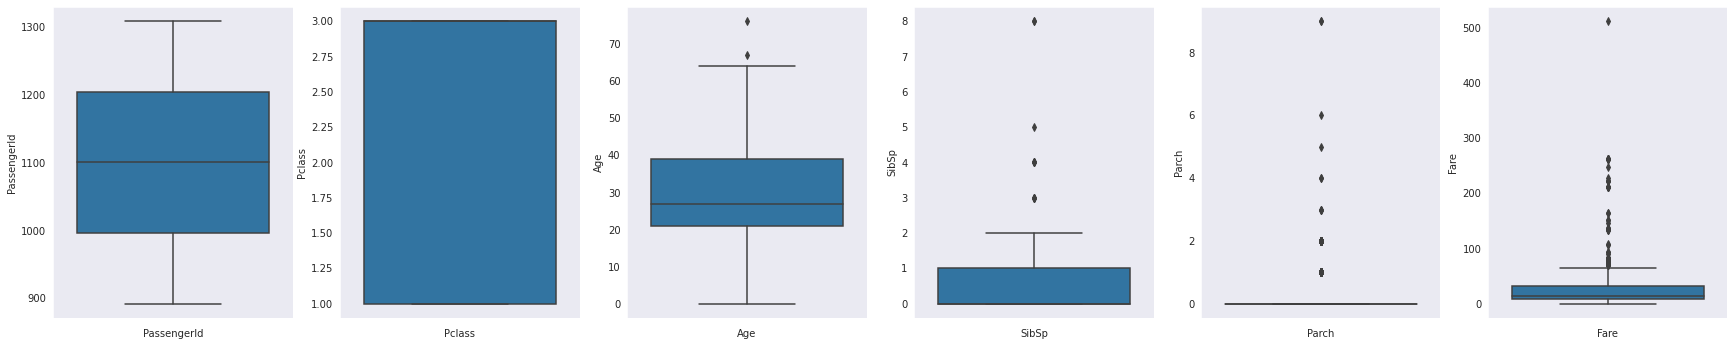

In [ ]:
#checking test dataset.
num_df_test=df_test.drop(['Name', 'Sex', 'Embarked', 'Ticket', 'Cabin'],axis=1)
plt.figure(figsize=(30,40))
k=1
for i in num_df_test.columns:
  plt.subplot(6,6,k)
  sns.boxplot(y=df_test[i])
  plt.xlabel(i)
  k=k+1

### Step 4: Data preparation of train data.

#### Handling the Null values.

#### As there are many null values in the cabin coloumn, we will just drop it.

In [ ]:
df_train = df_train.drop(['Cabin'],axis = 1)

#### Now we will try to find out any relation of age with Pclass and embarked coloumn to fix out the Null values.

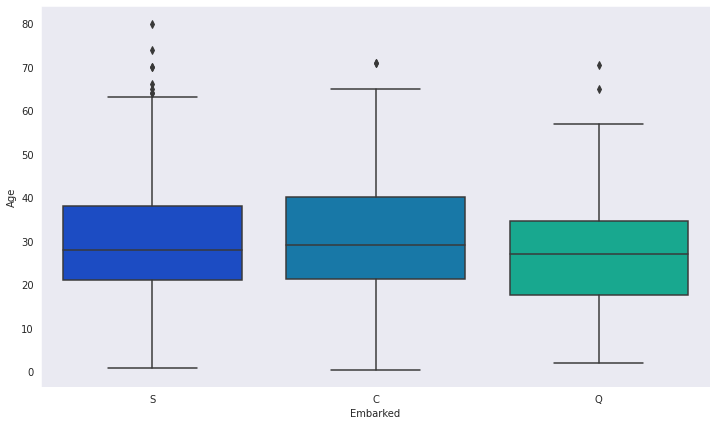

In [ ]:
#relation between embark and age
plt.figure(figsize=(12, 7))
sns.boxplot(x='Embarked',y='Age',data=df_train,palette='winter')

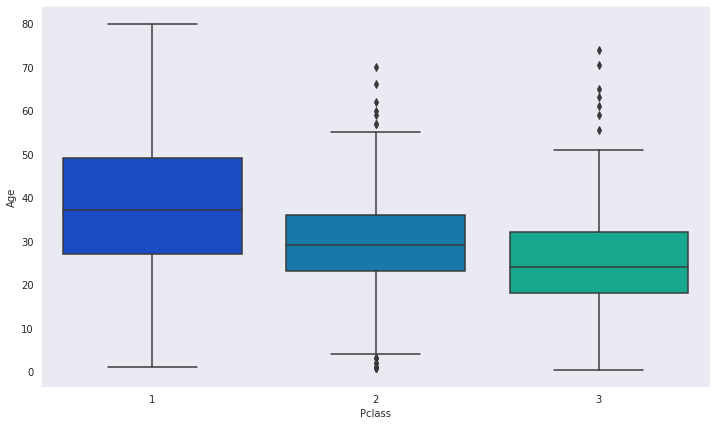

In [ ]:
#relation between Pclass and age.
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df_train,palette='winter')

#### We can clearly find a relation between Pclass and age. That also makes a sense, older passsengers travell in more expensive class.

#### I will impute null values with the mean of the age of passengers of a particular Pclass

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [ ]:
df_train['Age'] = df_train[['Age','Pclass']].apply(impute_age,axis=1)

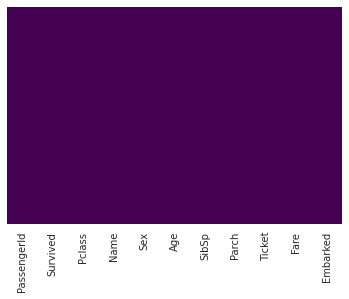

In [ ]:
#let us again check null values in train through heatmap.
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Let us now convert the categorical variables in dummy variables.

In [ ]:
#first dropping name and ticket number as it has no usage.
df_train=df_train.drop(['Name', 'Ticket'],axis=1)

In [ ]:
#let us check the categorical values again.
categorical_feature_columns = list(set(df_train.columns) - set(df_train._get_numeric_data().columns))
categorical_feature_columns

['Embarked', 'Sex']

In [ ]:
# List of variables to map
varlist = ['Sex']
# Defining the map function
def binary_map(x):
    return x.map({'male': 1, "female": 0})
# Applying the function to the housing list
df_train[varlist] = df_train[varlist].apply(binary_map)

In [ ]:
#lets check the sex coloumn
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


#### We have mapped Sex feature with O's and 1's. Now we will convert the multi level variables like Embark into dummy variable.

In [ ]:
#making dummy variable for embark
status = pd.get_dummies(df_train['Embarked'])

In [ ]:
status.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
#dropping the first coloumn.
status = pd.get_dummies(df_train['Embarked'],drop_first = True)

In [ ]:
# Add the results to the original titanic dataframe
df_train = pd.concat([df_train, status], axis = 1)

In [ ]:
# Now let's see the info of our dataframe.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
 9   Q            891 non-null    uint8  
 10  S            891 non-null    uint8  
dtypes: float64(2), int64(6), object(1), uint8(2)
memory usage: 64.5+ KB


In [ ]:
#now we no more need the embarked coloumn, we will just drop it.
df_train = df_train.drop(['Embarked'],axis=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Q            891 non-null    uint8  
 9   S            891 non-null    uint8  
dtypes: float64(2), int64(6), uint8(2)
memory usage: 57.6 KB


#### SibSp and Parch data appears related that is number of relatives and also have outliers. Let us look if it can be dropped or a relation can be drawn out between survival and relatives from it.

In [ ]:
def bar_chart(feature):
    survived = df_train[df_train['Survived']==1][feature].value_counts()
    dead = df_train[df_train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

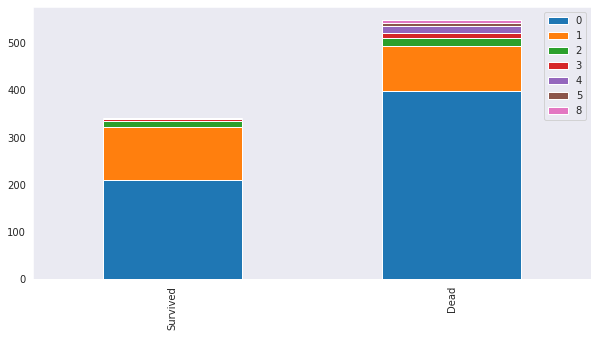

In [ ]:
#checking sibsp
bar_chart('SibSp')

#### The Chart confirms a person aboarded with more than 2 siblings or spouse more likely survived
#### The Chart confirms a person aboarded without siblings or spouse more likely dead

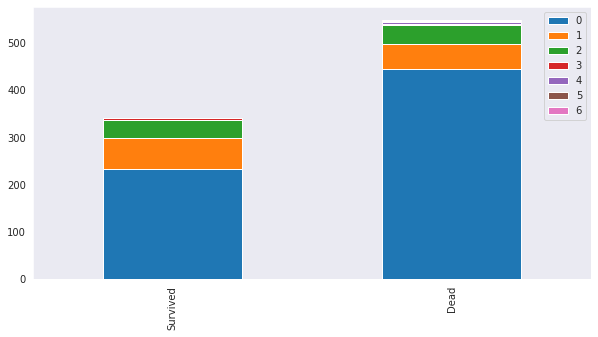

In [ ]:
#checking parch
bar_chart('Parch')

#### The Chart confirms a person aboarded with more than 2 parents or children more likely survived
#### The Chart confirms a person aboarded alone more likely dead

#### Therefore we will merge this variable into one variable relatives and make another variable dummy variable for alone or not. Alone = 0 and Not-Alone = 1

In [ ]:
#making the relative coloumn and the not_alone coloumn
data = [df_train]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
df_train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [ ]:
#now let us drop the Parch and SibSp variable as it is not required
df_train = df_train.drop(['Parch','SibSp'],axis = 1)

In [ ]:
#let us again check the head of the data.
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Q,S,relatives,not_alone
0,1,0,3,1,22.0,7.2500,0,1,1,0
1,2,1,1,0,38.0,71.2833,0,0,1,0
2,3,1,3,0,26.0,7.9250,0,1,0,1
3,4,1,1,0,35.0,53.1000,0,1,1,0
4,5,0,3,1,35.0,8.0500,0,1,0,1


### Step 4: Data preparation of test data.

#### As there are many null values in the cabin we will drop it.

#### First we wil handle the null values.

In [ ]:
df_test = df_test.drop(['Cabin'],axis = 1)

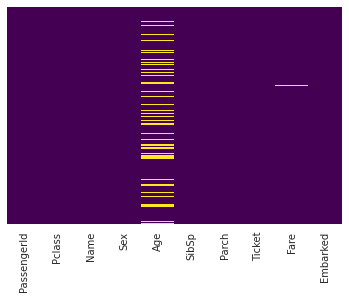

In [ ]:
#let us check the null values again
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#we will now fill the null values of age like in train data.
df_test['Age'] = df_test[['Age','Pclass']].apply(impute_age,axis=1)

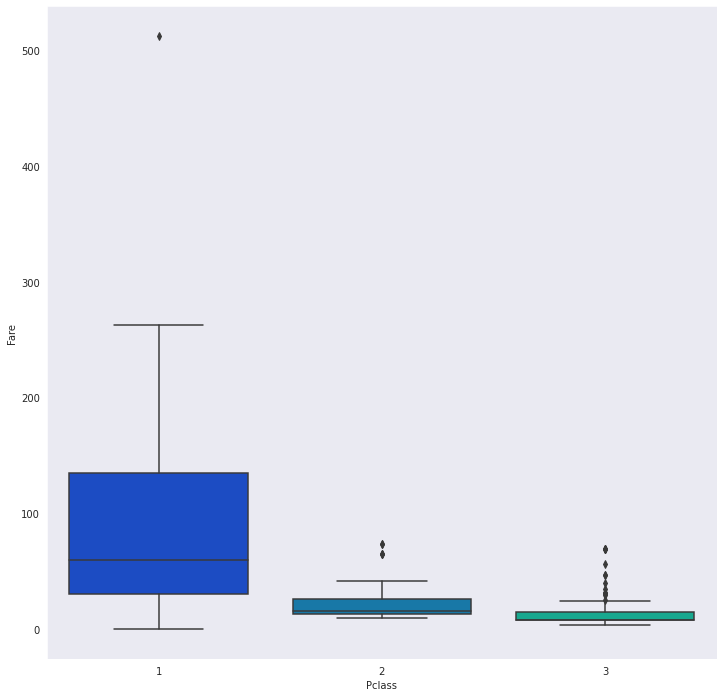

In [ ]:
#for filling the null value in fare let us check relation between fare and Pclass to find the average.
#relation between Pclass and fare.
plt.figure(figsize=(12, 12))
sns.boxplot(x='Pclass',y='Fare',data=df_test,palette='winter')

#### Let us find out the Pclass where the fare value is null.

In [ ]:
sns.boxplot?

In [ ]:
def impute_fare(cols):
    Fare = cols[0]
    Pclass = cols[1]    
    if pd.isnull(Fare):
        if Pclass == 1:
            return 60
        elif Pclass == 2:
            return 20
        else:
            return 15
    else:
        return Fare

In [ ]:
df_test['Fare'] = df_train[['Fare','Pclass']].apply(impute_fare,axis=1)

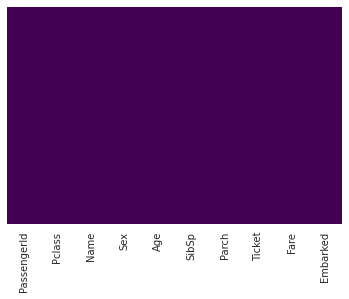

In [ ]:
#let us check the null values again
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### So no null values left now we will go for converting categorical values into dummy values.

In [ ]:
#checking categorical values in test dataset again.
categorical_feature_columns = list(set(df_test.columns) - set(df_test._get_numeric_data().columns))
categorical_feature_columns

['Name', 'Ticket', 'Embarked', 'Sex']

#### We will drop Name and Ticket as it has no use to us.

In [ ]:
#dropping name and ticket number as it has no usage.
df_test=df_test.drop(['Name', 'Ticket'],axis=1)

In [ ]:
#let us check the categorical values again.
categorical_feature_columns = list(set(df_test.columns) - set(df_test._get_numeric_data().columns))
categorical_feature_columns

['Embarked', 'Sex']

In [ ]:
# Converting the sex variable
# List of variables to map
varlist = ['Sex']
# Defining the map function
def binary_map(x):
    return x.map({'male': 1, "female": 0})
# Applying the function to the test data
df_test[varlist] = df_test[varlist].apply(binary_map)

In [ ]:
#lets check the sex coloumn
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.2500,Q
1,893,3,0,47.0,1,0,71.2833,S
2,894,2,1,62.0,0,0,7.9250,Q
3,895,3,1,27.0,0,0,53.1000,S
4,896,3,0,22.0,1,1,8.0500,S


In [ ]:
#making dummy variable for embark
status = pd.get_dummies(df_test['Embarked'])

In [ ]:
status.head()

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [ ]:
#dropping the first coloumn.
status = pd.get_dummies(df_test['Embarked'],drop_first = True)

In [ ]:
# Add the results to the original titanic dataframe
df_test = pd.concat([df_test, status], axis = 1)

In [ ]:
#Now let us see the info of our data frame.
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
 8   Q            418 non-null    uint8  
 9   S            418 non-null    uint8  
dtypes: float64(2), int64(5), object(1), uint8(2)
memory usage: 27.1+ KB


In [ ]:
#now we no more need the embarked coloumn, we will just drop it.
df_test = df_test.drop(['Embarked'],axis=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Q            418 non-null    uint8  
 8   S            418 non-null    uint8  
dtypes: float64(2), int64(5), uint8(2)
memory usage: 23.8 KB


#### Like in the train data we will treat the parch and sibsp data.

In [ ]:
#making the relative coloumn and the not_alone coloumn
data = [df_test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
df_test['not_alone'].value_counts()

1    253
0    165
Name: not_alone, dtype: int64

In [ ]:
#now let us drop the Parch and SibSp variable as it is not required
df_test = df_test.drop(['Parch','SibSp'],axis = 1)

In [ ]:
#let us again check the head of the data.
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Q,S,relatives,not_alone
0,1,0,3,1,22.0,7.2500,0,1,1,0
1,2,1,1,0,38.0,71.2833,0,0,1,0
2,3,1,3,0,26.0,7.9250,0,1,0,1
3,4,1,1,0,35.0,53.1000,0,1,1,0
4,5,0,3,1,35.0,8.0500,0,1,0,1


#### Step 5: Model building.

In [ ]:
X_train = df_train.drop(['Survived','PassengerId'],axis = 1)
X_test = df_test.drop(['PassengerId'],axis = 1)
y_train = df_train['Survived']

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(C=1e5)

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X_train, y_train)
logreg_Y_pred=logreg.predict(X_test)
logreg_accuracy=logreg.score(X_train,y_train)
logreg_accuracy

0.8069584736251403

In [ ]:
logreg_submission = pd.DataFrame({"PassengerId": df_test["PassengerId"], "Survived": logreg_Y_pred})
logreg_submission.to_csv('submission.csv', index=False)

In [ ]:
df_test.shape

(418, 9)